# W2.1 Perfilado y Limpieza de Datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 200


In [5]:
file_path = 'online_retail_II.xlsx'
if not Path(file_path).exists():
    print(f'Archivo no encontrado: {file_path}. Sube el archivo en Colab o cambia la ruta.')
else:
    df1 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
    df2 = pd.read_excel(file_path, sheet_name='Year 2010-2011')
    df = pd.concat([df1, df2], ignore_index=True)
    print('Dataset cargado. Filas:', df.shape[0], 'Columnas:', df.shape[1])
    display(df.head())


Dataset cargado. Filas: 1067371 Columnas: 8


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Parte 1 — Integración y Exploración

1. Carga e inspección: muestra `shape`, tipos y primeras filas.

In [6]:
# Shape, dtypes y primeras filas
try:
    print('Shape:', df.shape)
    print('\nTipos de datos:')
    display(df.dtypes)
    print('\nPrimeras filas:')
    display(df.head())
except NameError:
    print('Ejecuta la celda de lectura del archivo primero.')


Shape: (1067371, 8)

Tipos de datos:


,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object



Primeras filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### 2. Tipo de datos — Validación y conversión
Aseguramos `InvoiceDate` como datetime y validamos `Quantity` y `UnitPrice` como numéricas.

In [12]:
# Asegurar tipos
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Verificar qué columna existe: UnitPrice o Price
if 'UnitPrice' in df.columns:
    df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
elif 'Price' in df.columns:
    # Si el dataset usa la columna "Price", la renombramos a UnitPrice para mantener coherencia
    df['UnitPrice'] = pd.to_numeric(df['Price'], errors='coerce')
else:
    print("⚠️ No se encontró ninguna columna de precio ('UnitPrice' o 'Price'). Verifica los nombres de las columnas del dataset.")

# Convertir Quantity a numérico
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Columnas categóricas sugeridas
for col in ['InvoiceNo', 'StockCode', 'Description', 'Country', 'CustomerID']:
    if col in df.columns:
        df[col] = df[col].astype('object')

print('Tipos después de la conversión:')
display(df.dtypes)


Tipos después de la conversión:


,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object
UnitPrice,float64


### 3. Variables derivadas
Calculamos `TotalPrice = Quantity * UnitPrice`.

In [13]:
# Crear TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
display(df[['Quantity','UnitPrice','TotalPrice']].head())


,Quantity,UnitPrice,TotalPrice
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


### 4. Distribuciones — Histogramas (numéricas)
Generamos histogramas por columnas numéricas. Ejecuta una celda por gráfico.

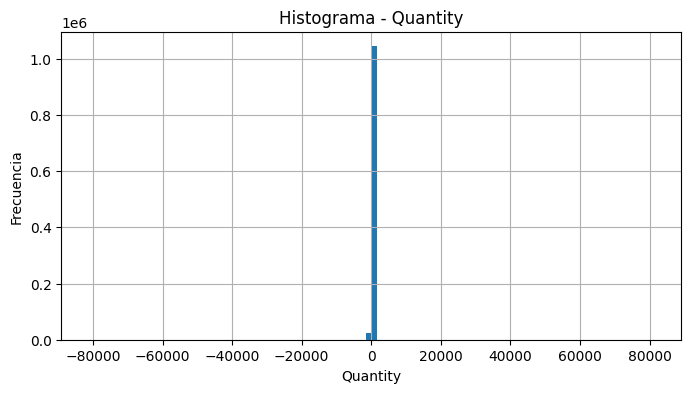

In [14]:
# Histograma: Quantity
plt.figure(figsize=(8,4))
df['Quantity'].dropna().hist(bins=100)
plt.title('Histograma - Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frecuencia')
plt.show()


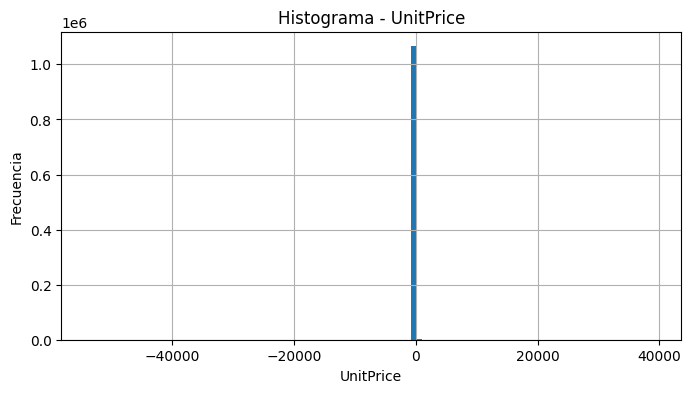

In [15]:
# Histograma: UnitPrice
plt.figure(figsize=(8,4))
df['UnitPrice'].dropna().hist(bins=100)
plt.title('Histograma - UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frecuencia')
plt.show()


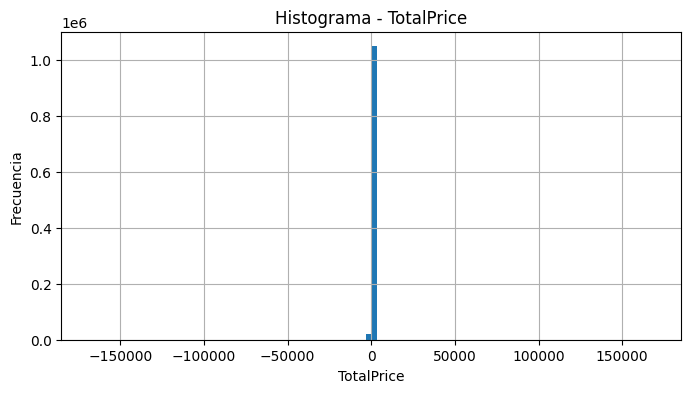

In [16]:
# Histograma: TotalPrice
plt.figure(figsize=(8,4))
df['TotalPrice'].dropna().hist(bins=100)
plt.title('Histograma - TotalPrice')
plt.xlabel('TotalPrice')
plt.ylabel('Frecuencia')
plt.show()


### Boxplots — columnas numéricas (una celda por gráfico)

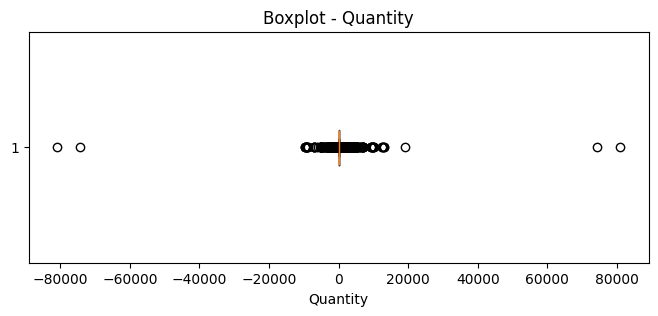

In [17]:
# Boxplot: Quantity
plt.figure(figsize=(8,3))
plt.boxplot(df['Quantity'].dropna(), vert=False)
plt.title('Boxplot - Quantity')
plt.xlabel('Quantity')
plt.show()


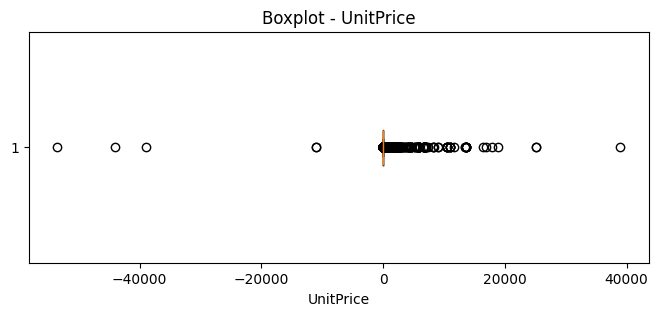

In [18]:
# Boxplot: UnitPrice
plt.figure(figsize=(8,3))
plt.boxplot(df['UnitPrice'].dropna(), vert=False)
plt.title('Boxplot - UnitPrice')
plt.xlabel('UnitPrice')
plt.show()


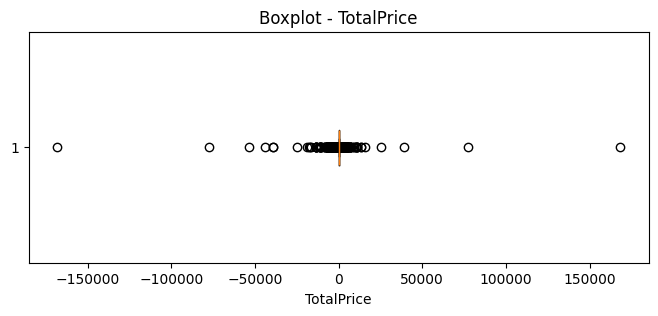

In [19]:
# Boxplot: TotalPrice
plt.figure(figsize=(8,3))
plt.boxplot(df['TotalPrice'].dropna(), vert=False)
plt.title('Boxplot - TotalPrice')
plt.xlabel('TotalPrice')
plt.show()


### Barras — categorías (top 10)
Mostramos barras de las 10 categorías más frecuentes por columna.

In [24]:
# Top 10 categorías por número de facturas (usando el nombre correcto de la columna)
top_categories = df.groupby('Description')['Invoice'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 Categorías por número de facturas")
plt.xlabel("Número de facturas únicas")
plt.ylabel("Categoría (Description)")
plt.show()



NameError: name 'sns' is not defined

<Figure size 1000x500 with 0 Axes>

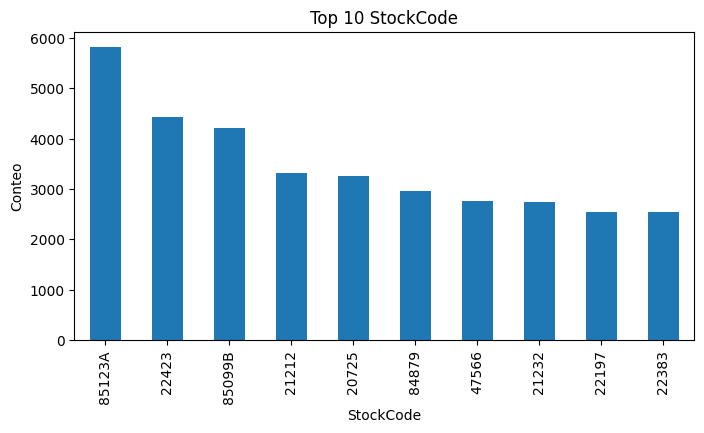

In [25]:
# Top 10 StockCode
top_stock = df['StockCode'].value_counts().head(10)
plt.figure(figsize=(8,4))
top_stock.plot(kind='bar')
plt.title('Top 10 StockCode')
plt.xlabel('StockCode')
plt.ylabel('Conteo')
plt.show()


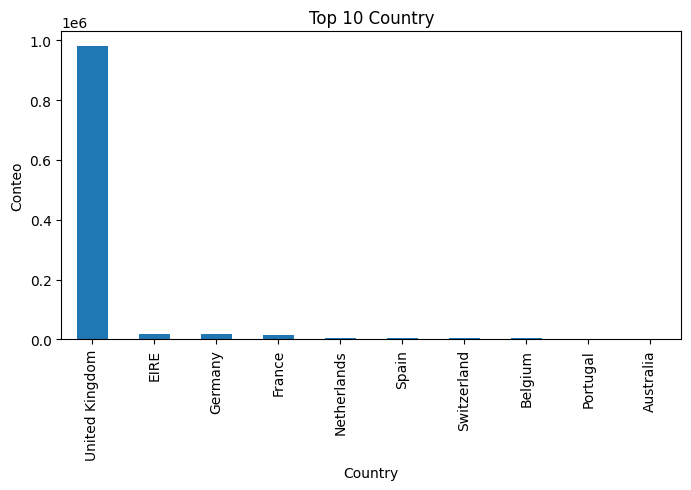

In [26]:
# Top 10 Country
top_country = df['Country'].value_counts().head(10)
plt.figure(figsize=(8,4))
top_country.plot(kind='bar')
plt.title('Top 10 Country')
plt.xlabel('Country')
plt.ylabel('Conteo')
plt.show()


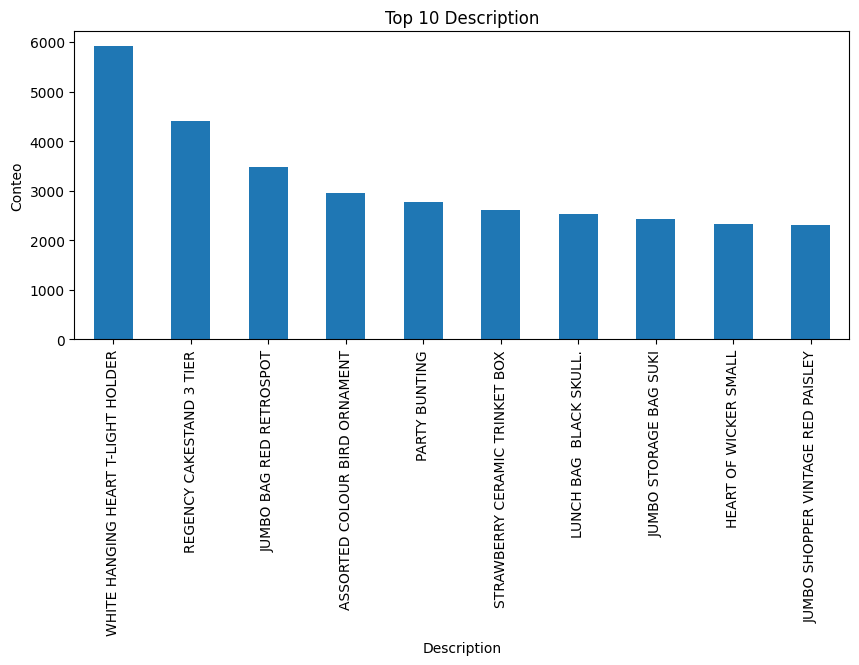

In [27]:
# Top 10 Description (productos más frecuentes)
top_desc = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,4))
top_desc.plot(kind='bar')
plt.title('Top 10 Description')
plt.xlabel('Description')
plt.ylabel('Conteo')
plt.show()


## Parte 2 — Perfilado de Calidad
1. Nulos por columna
2. Duplicados
3. Outliers en `Quantity` y `UnitPrice`

In [28]:
# 1) Nulos por columna (%)
nulls = df.isnull().mean()*100
display(pd.DataFrame({'columna': nulls.index, 'pct_null': nulls.values}).sort_values('pct_null', ascending=False).reset_index(drop=True))


,columna,pct_null
0,Customer ID,22.766873
1,Description,0.410541
2,StockCode,0.000000
3,Invoice,0.000000
4,InvoiceDate,0.000000
5,Quantity,0.000000
6,Price,0.000000
7,Country,0.000000
8,UnitPrice,0.000000
9,TotalPrice,0.000000


In [29]:
# 2) Duplicados exactos (filas idénticas)
total_rows = df.shape[0]
exact_dups = df.duplicated(keep=False).sum()
print('Filas totales:', total_rows)
print('Filas que tienen duplicados exactos (count):', exact_dups)
print('Filas duplicadas (drop duplicates keep=first):', df.duplicated().sum())


Filas totales: 1067371
Filas que tienen duplicados exactos (count): 67242
Filas duplicadas (drop duplicates keep=first): 34335


In [30]:
# 3) Outliers — método IQR para Quantity y UnitPrice
def detect_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return (series < lower) | (series > upper), lower, upper

for col in ['Quantity','UnitPrice']:
    s = df[col].dropna()
    out_mask, low, high = detect_iqr_outliers(s)
    pct_out = out_mask.mean()*100
    print(f'{col}: IQR lower={low}, upper={high}, % outliers (aprox)={pct_out:.4f}')


Quantity: IQR lower=-12.5, upper=23.5, % outliers (aprox)=10.9136
UnitPrice: IQR lower=-3.1000000000000005, upper=8.5, % outliers (aprox)=6.3806


## Parte 3 — Limpieza
1. Duplicados exactos y por clave (ejemplo clave: InvoiceNo, StockCode, InvoiceDate)
2. Valores faltantes — CustomerID: análisis de impacto

Se documenta el criterio: por defecto conservaremos la fila más reciente al eliminar duplicados por clave; para filas exactas se eliminarán dejando la primera aparición.

In [31]:
# Conteo antes de limpieza
before = df.shape[0]

# 1) Duplicados exactos: eliminar y mostrar conteo antes/después
exact_before = df.duplicated().sum()
df_no_exact_dup = df.drop_duplicates(keep='first')
exact_after = df_no_exact_dup.duplicated().sum()
print('Duplicados exactos - antes:', exact_before, 'después (debería ser 0):', exact_after)

# 2) Duplicados por clave: usando ['InvoiceNo','StockCode','InvoiceDate','CustomerID']
key_cols = ['InvoiceNo','StockCode','InvoiceDate','CustomerID']
key_cols = [c for c in key_cols if c in df_no_exact_dup.columns]
dup_by_key_before = df_no_exact_dup.duplicated(subset=key_cols).sum()
# criterio: conservar la fila con UnitPrice != 0 y, si hay empate, la más reciente (mayor InvoiceDate)
def dedup_by_key(df_):
    # ordenar por InvoiceDate asc para que keep='last' conserve la más reciente
    if 'InvoiceDate' in df_.columns:
        df_sorted = df_.sort_values('InvoiceDate')
    else:
        df_sorted = df_.copy()
    # priorizar filas con UnitPrice != 0: crear helper key
    if 'UnitPrice' in df_sorted.columns:
        df_sorted['_price_nonzero'] = (df_sorted['UnitPrice'] != 0).astype(int)
        # ordenar por price_nonzero then InvoiceDate
        df_sorted = df_sorted.sort_values(['_price_nonzero'], ascending=False)
    deduped = df_sorted.drop_duplicates(subset=key_cols, keep='first').drop(columns=[c for c in ['_price_nonzero'] if c in df_sorted.columns])
    return deduped

df_dedup_key = dedup_by_key(df_no_exact_dup)
dup_by_key_after = df_dedup_key.duplicated(subset=key_cols).sum()
print('Duplicados por clave - antes:', dup_by_key_before, 'después:', dup_by_key_after)

after = df_dedup_key.shape[0]
print('\nFilas antes de limpieza total:', before, 'después:', after)


Duplicados exactos - antes: 34335 después (debería ser 0): 0
Duplicados por clave - antes: 15440 después: 0

Filas antes de limpieza total: 1067371 después: 1017596


In [32]:
# 3) CustomerID faltantes: cuantificar impacto de eliminarlas
if 'CustomerID' in df_dedup_key.columns:
    total = df_dedup_key.shape[0]
    missing_cust = df_dedup_key['CustomerID'].isnull().sum()
    pct_missing = missing_cust/total*100
    print('Filas totales:', total)
    print('Filas sin CustomerID:', missing_cust, f'({pct_missing:.2f}%)')
    # crear dataset sin CustomerID
    df_no_missing_cust = df_dedup_key.dropna(subset=['CustomerID'])
    print('Filas si eliminamos filas sin CustomerID:', df_no_missing_cust.shape[0])
else:
    print('No hay columna CustomerID en el dataset.')


No hay columna CustomerID en el dataset.


## Parte 4 — Data Contract
Generaremos un Data Contract en formato JSON para las columnas clave: InvoiceNo, InvoiceDate, StockCode, Description, Quantity, UnitPrice, CustomerID.

In [33]:
# Data Contract básico (ejemplo en JSON)
data_contract = {
    'InvoiceNo': {
        'type': 'string',
        'nullable': False,
        'constraints': {
            'pattern': '^\\w+',
            'notes': 'Si comienza con C indica cancelación (ej: C12345)'
        }
    },
    'InvoiceDate': {
        'type': 'datetime',
        'nullable': False,
        'constraints': {
            'format': 'ISO 8601',
            'notes': 'Rango esperado: 2009-12-01 a 2011-12-09'
        }
    },
    'StockCode': {'type': 'string', 'nullable': False},
    'Description': {'type': 'string', 'nullable': True},
    'Quantity': {
        'type': 'integer',
        'nullable': False,
        'constraints': {'min': None, 'notes': 'Valores negativos indican devoluciones'}
    },
    'UnitPrice': {
        'type': 'float',
        'nullable': False,
        'constraints': {'min': 0.0}
    },
    'CustomerID': {'type': 'string', 'nullable': True}
}

# Guardar el data contract y el dataset limpio
out_dir = Path('/content') if Path('/content').exists() else Path('/mnt/data')
out_dir = out_dir
clean_csv = out_dir / 'online_retail_clean.csv'
contract_file = out_dir / 'data_contract_online_retail.json'
df_dedup_key.to_csv(clean_csv, index=False)
with open(contract_file, 'w', encoding='utf-8') as f:
    json.dump(data_contract, f, indent=2, ensure_ascii=False)

print('Archivo CSV limpio guardado en:', clean_csv)
print('Data contract guardado en:', contract_file)


Archivo CSV limpio guardado en: /content/online_retail_clean.csv
Data contract guardado en: /content/data_contract_online_retail.json


## Parte 5 — Conclusiones
Resumen breve antes/después de la limpieza.

In [34]:
# Tabla resumen antes/después
summary = {
    'metric': ['filas_totales','duplicados_exactos_before','duplicados_exactos_after','duplicados_por_clave_before','duplicados_por_clave_after','filas_sin_customerID_pct_before'],
    'value': [
        int(before),
        int(exact_before),
        int(exact_after),
        int(dup_by_key_before),
        int(dup_by_key_after),
        float((df['CustomerID'].isnull().sum()/df.shape[0])*100) if 'CustomerID' in df.columns else None
    ]
}
summary_df = pd.DataFrame(summary)
display(summary_df)


,metric,value
0,filas_totales,1067371.0
1,duplicados_exactos_before,34335.0
2,duplicados_exactos_after,0.0
3,duplicados_por_clave_before,15440.0
4,duplicados_por_clave_after,0.0
5,filas_sin_customerID_pct_before,NaN
